# Kalorimetrie Laborversuch

Author: Zidane Bürmann

Datum: 10.12.2023

Gruppe: 37

## Forschungsfrage

Wie genau und zuverlässig ist die Bestimmung von spezifischen Wärmekapazitäten ausgewählter Proben mithilfe des verwendeten Kalorimeters?

## Versuchsaufbau und Durchführung

Zunächst wird Wasser in einen Topf gefüllt. Anschließend wird das Wasser durch einen Garer erhitzt. Im nächsten Schritt wird ein Glasbecher mit vorher abgewogenem Wasser gefüllt. Im Inneren des Glases wird ein Magnet angebracht, der dafür sorgt, dass das Wasser an allen Stellen des Glases die gleiche Temperatur hat. Um die Temperatur zu messen, werden fünf Sensoren benötigt. Einer befindet sich im Topf, drei im Glasbecher und der letzte misst die Umgebungstemperatur. Für das Experiment werden drei Zylinder aus verschiedenen Materialien verwendet, dessen Wärmekapazitäten zu bestimmen sind. Die drei Zylinder werden in den Topf gestellt, wodurch sie sich auf die voreingestellte Wassertemperatur von 80° erwärmen. Anschließend wird einer der Zylinder in das Becherglas mit kaltem Wasser gestellt und für eine bestimmte Zeit stehen gelassen. Schließlich wird die Temperaturänderung des Wassers während des Prozesses mit Hilfe von Sensoren gemessen.


<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = 'data/Heat_Capacity/data.h5'

# DONE #

In [4]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [5]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [i for  i,name in enumerate(data_dict['name']) if 'temperature_calorimeter' in name]
index_environment = [i for  i,name in enumerate(data_dict['name']) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [6]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


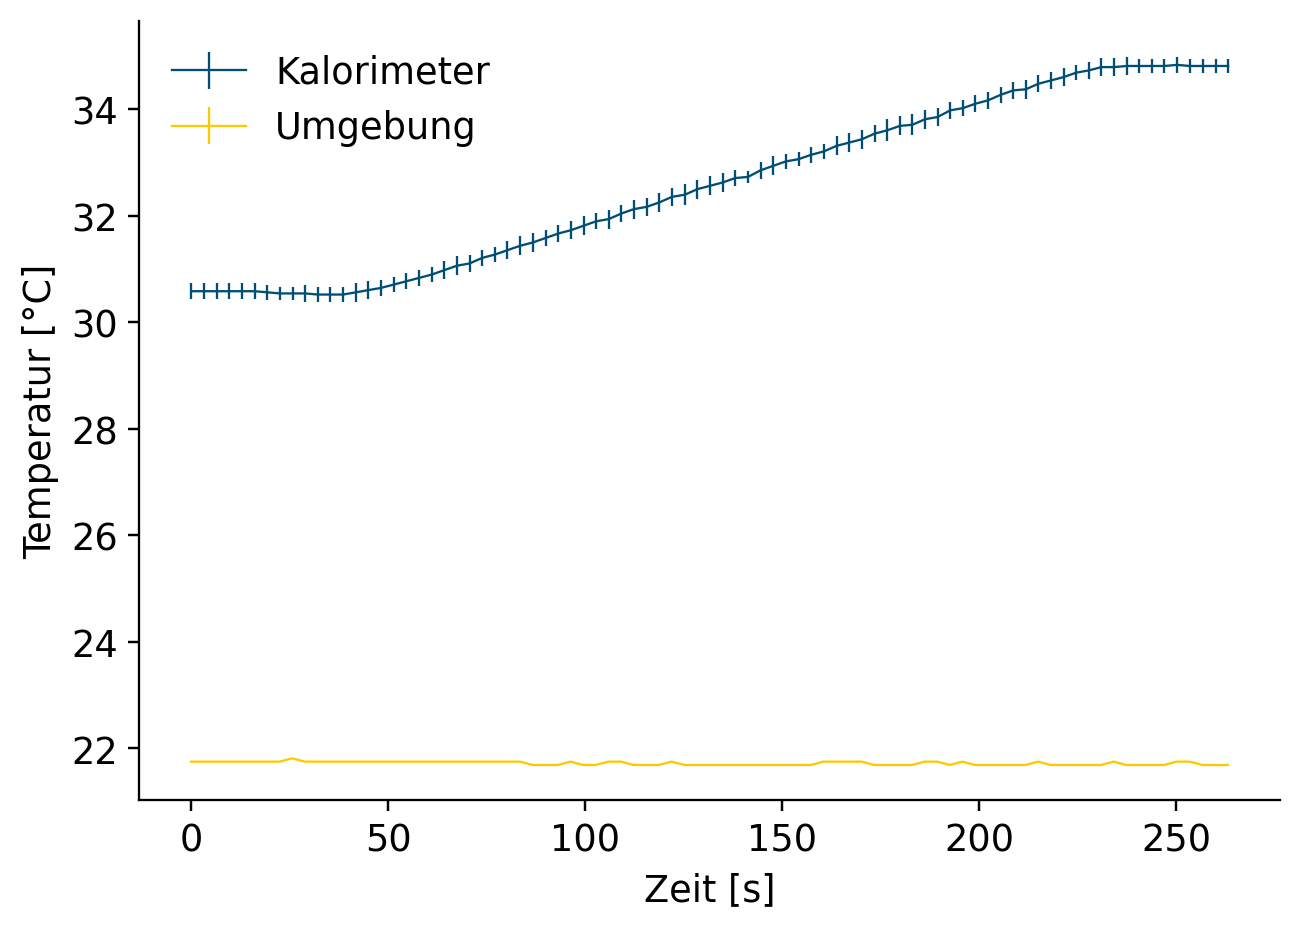

In [7]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

time = np.mean(data_dict['timestamp'][index_calorimeter],axis=0)
time_env = np.mean(data_dict['timestamp'][index_environment],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]], ['Kalorimeter', 'Umgebung'], 'Zeit [s]','Temperatur [°C]')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry('datasheets', '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass', 'value'])

# DONE #

In [9]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
with h5.File(datafile_path_const, "r") as f:
    current = f['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current'][()]
    heat_time = f['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time'][()]
    voltage = f['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage'][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [10]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [11]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [12]:
a = str(calorimeter_const) + ' J/K'
a.strip()
print(a)

1914.8108108108108 J/K


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [13]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = 'data/PDC003/PDC003.h5'

# DONE #

In [14]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [15]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict['name']) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict['name']) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict['name']) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [16]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

In [17]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = np.mean(data_dict['timestamp'][index_calorimeter], axis=0)
time_env = np.mean(data_dict['timestamp'][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],['Kalorimeter', 'Umgebung'],'Zeit in Sekunden','Temperature in °C')


# DONE #

#### (iv) Metadaten auslesen

In [18]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry('datasheets', '1ee57b2e-d878-640b-b947-b68f86e0e1c9', ['probe', 'mass', 'value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [19]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])

# DONE #

In [20]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [21]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [22]:
a = str(sample_heat_capa) + ' kJ/(kg*K)'
a.strip()
print(a)

0.5237928132506164 kJ/(kg*K)


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [23]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = 'data/PDC012/PDC012.h5'

# DONE #

In [24]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")
# DONE #

In [25]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict['name']) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict['name']) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict['name']) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [26]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

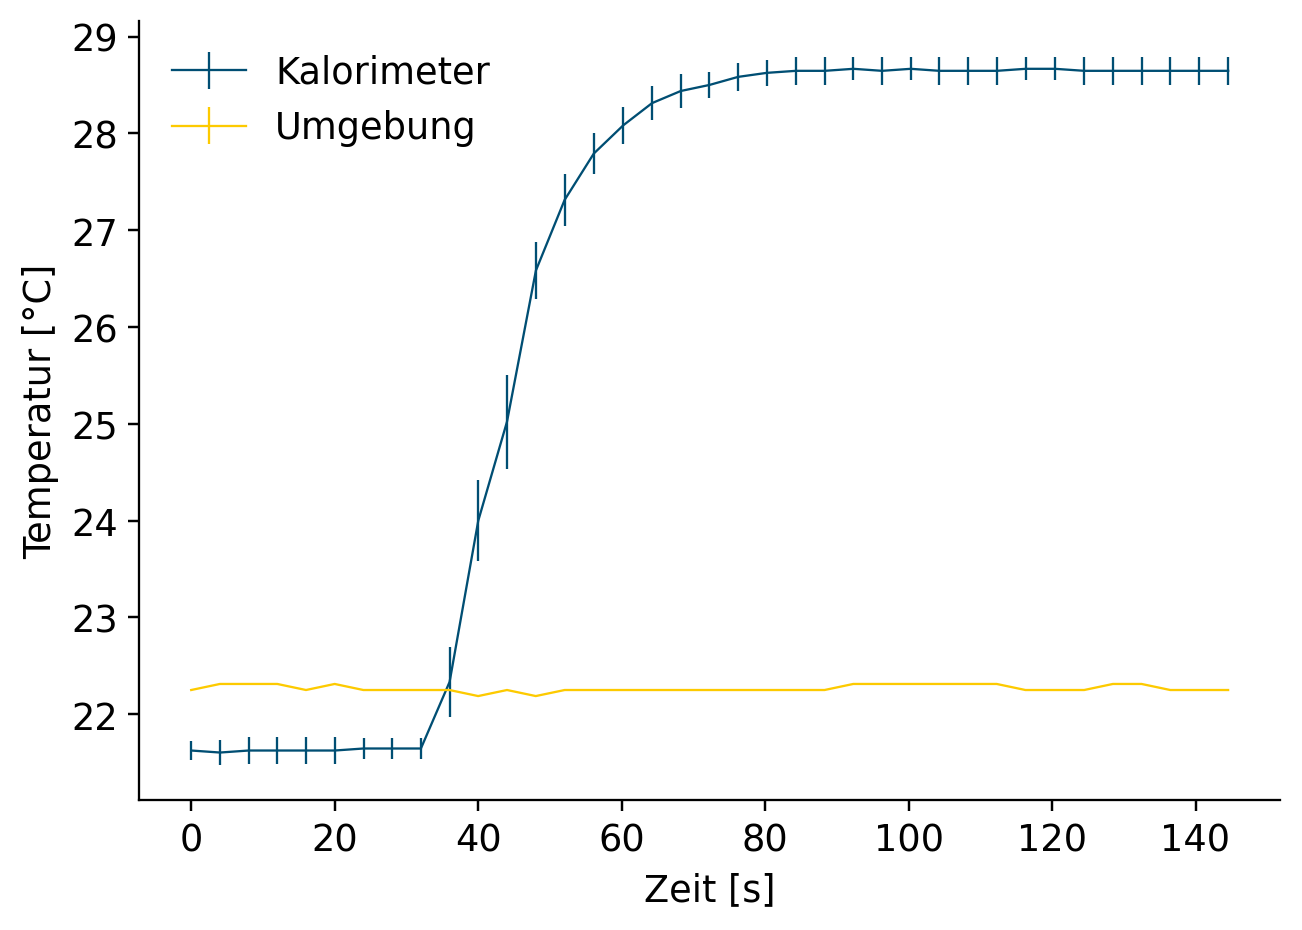

In [27]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = np.mean(data_dict['timestamp'][index_calorimeter], axis=0)
time_env = np.mean(data_dict['timestamp'][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],['Kalorimeter', 'Umgebung'],'Zeit [s]','Temperatur [°C]')


# DONE #

#### (iv) Metadaten auslesen

In [28]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry('datasheets', '1ee57b38-1b08-63da-8b38-63a271236a0b', ['probe', 'mass', 'value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [29]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])
# DONE #

In [30]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [31]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [32]:
a = str(sample_heat_capa) + ' kJ/(kg*K)'
a.strip()
print(a)

0.4074091986264932 kJ/(kg*K)


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [33]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = 'data/PDC028/PDC028.h5'

# DONE #

In [34]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")
# DONE #

In [35]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict['name']) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict['name']) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict['name']) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [36]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
# DONE #

#### (iii) Daten ploten

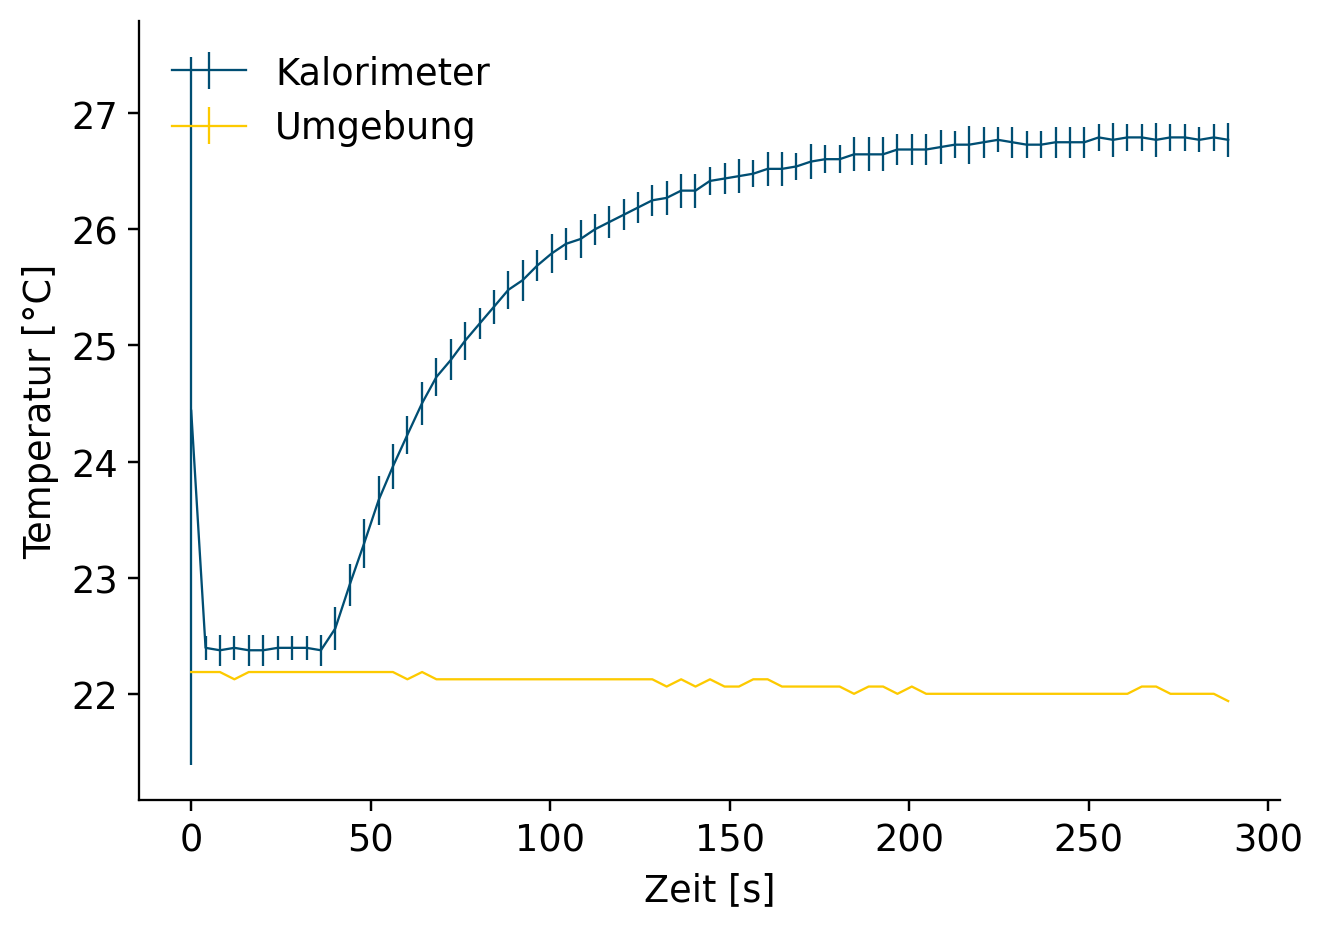

In [37]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = np.mean(data_dict['timestamp'][index_calorimeter], axis=0)
time_env = np.mean(data_dict['timestamp'][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],['Kalorimeter', 'Umgebung'],'Zeit [s]','Temperatur [°C]')


# DONE #

#### (iv) Metadaten auslesen

In [38]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry('datasheets', '1ee7d44b-07b6-6af8-adbe-d5e4818c9942', ['probe', 'mass', 'value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [39]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

In [40]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [41]:
# TODO: Calulate specific heat capacity of the sample.\

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [42]:
a = str(sample_heat_capa) + ' kJ/(kg*K)'
a.strip()
print(a)

2.682442099203377 kJ/(kg*K)


## Diskussion

Es ist wichtig, dass die aus dem Heißwasserbad entnommene Probe möglichst wenig Wasser mit aus dem Bad nimmt, da so die Wärmeübertragungseigenschaften der Probe beeinflusst werden. Das liegt daran, dass auch das Wasser in der Lage ist, Wärme aufzunehmen bzw. abzugeben. So kann es passieren, dass die von den Sensoren gemessenen Temperaturen durch das Heißwasser verfälscht werden, da nicht nur die Wärmemenge der Probe, sondern auch die des Wassers die Messung beeinflussen. Neben dem Wasser exisitieren auch andere, potentielle Fehlerquellen. Nämlich kann auch die Verunreinigung bzw der Zustand der Probenoberfläche die Wärmeleitungseigenschaften beeinflussen. Auch sind die Sensoren nicht zu 100% genau, wodurch die gemessenen Temperaturen eine gewisse Ungenauigkeit aufweisen.

Zusammenfassend haben sich also folgende Ergebnisse ergeben:

$$
c_{Edelstahl} = 0,5238 \frac{kJ}{kg \cdot K}, c_{Messing} = 0,4074 \frac{kJ}{kg \cdot K}, c_{PA66} = 2,6824 \frac{kJ}{kg \cdot K}
$$

Aus Recherche haben sich folgende Werte ergeben:

$$
c_{Edelstahl} = 0,5 \frac{kJ}{kg \cdot K}, c_{Messing} = 0,377 \frac{kJ}{kg \cdot K}, c_{PA66} = 1,7 \frac{kJ}{kg \cdot K}
$$

Durch vergleichen der berechneten Kapazitäten mit bekannten Kapazitäten aus Tabellen sieht man, dass die Werte von Edelstahl und Messing nur eine geringe Abweichung aufweisen, woraus zu schliessen ist, dass nicht nur der Versuchsaufbau und die Versuchsdurchführung ordentlich  durchgeführt wurden, sondern auch die oben genannten Einflussfaktoren akkumulativ zu keiner wesentlichen Verfälschung des Ergebnisses geführt haben. Die auffallende Abweichung bei dem Kunststoff PA66 kann eventuell daher kommen, dass die Probe mit einer erhöhten Menge an Wasser aus dem Heißbad in das Messbecken gegeben wurde.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Gelernt habe ich, wie wichtig eine genaue und ordentliche Arbeitsweise bei der Durchführung von Versuchen ist, da davon alle folgenden Arbeitsschritte abhängen. Somit bilden sie die Grundlage einer guten und zuverlässigen wissenschaftlichen Arbeit. Auch habe ich wieder gemerkt, wie wichtig Datenpflege im Zusammenhang mit der Auswertung der Messdaten ist, um eine übersichtliche und verständliche Auswertung des Versuchs zu erstellen.